In [1]:
print("test me")

test me


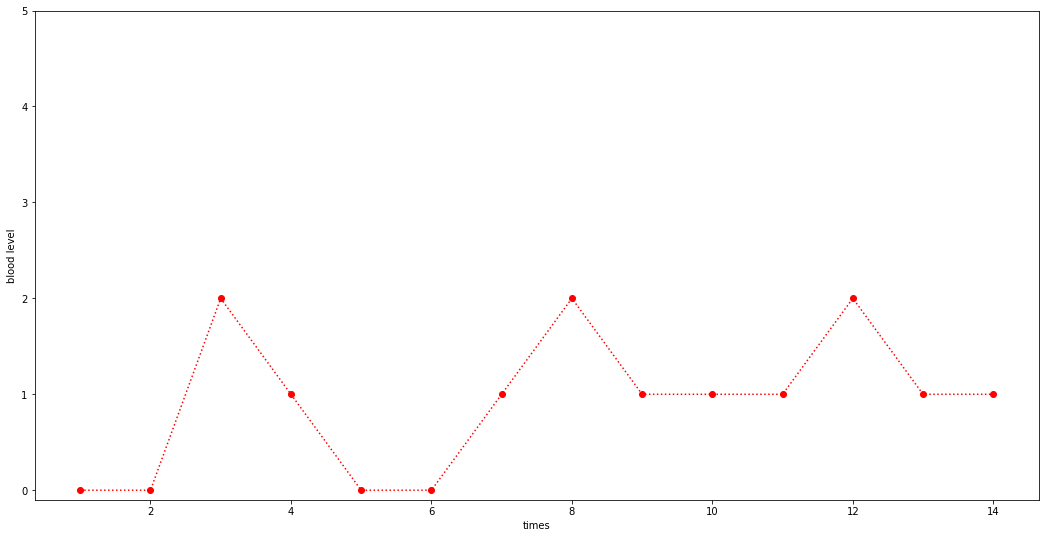

In [66]:
lst = np.array([0,0,2,1,0,0,1,2,1,1,1,2,1,1])
plt.figure(figsize=(18, 9))
plt.plot(np.arange(1,15), lst, 'r:',np.arange(1,15), lst, 'ro')
# plt.plot(np.arange(1,15), lst, 'ro')
# plt.axis([0, 15, -0.5, 5])
plt.axis([None, None, None, 5])
plt.ylabel('blood level')
plt.xlabel('times')
plt.show()

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings # necessary ??
filterwarnings('ignore')
def nprint(*objects): print(*objects,'', sep='\n')
print("setup complete!")

setup complete!


In [4]:
# read and check
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# basic data exporation
nprint("data shape =", df.shape)
df.describe()

data shape =
(1338, 7)



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [8]:
"""since nrows == count for all variables then there is no missing values"""
nprint("missing values for each variable : ",df.isnull().sum())
# df[df.isnull().any(axis=1)]  all rows with nan
# df[df['column name'].isnull()]  all rows with nan is specifique column
nprint("data types in our data set :\n", df.dtypes)

missing values for each variable : 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

data types in our data set :

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object



histogramme avec le graphe de densité


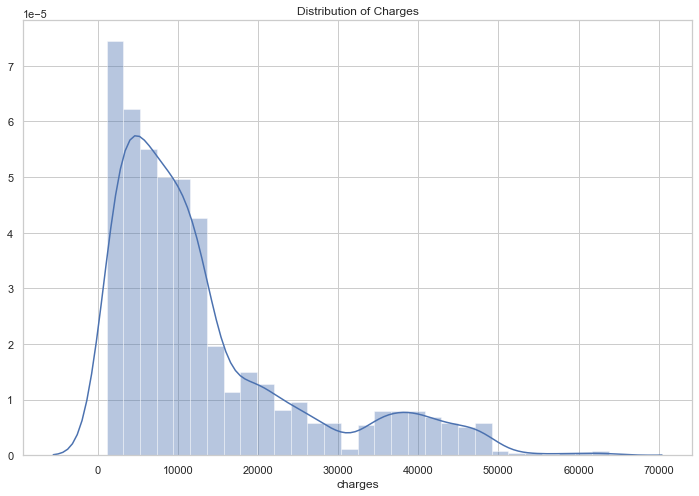

In [10]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'b')
plt.title('Distribution of Charges')
print("histogramme avec le graphe de densité")

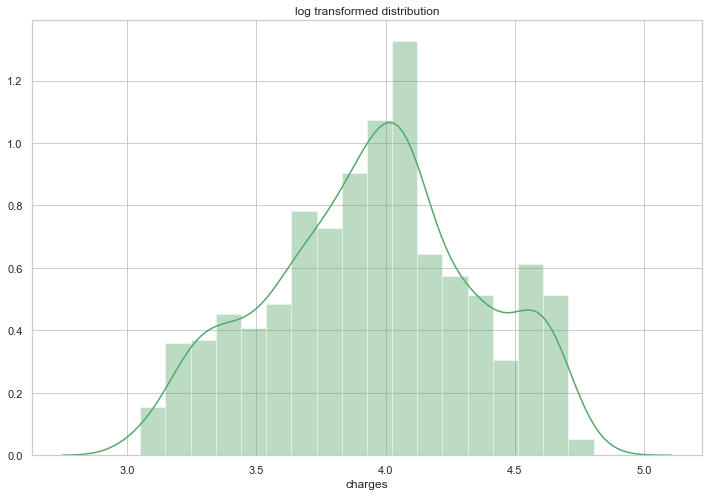

In [11]:
"""This distribution is right-skewed. We can apply natural log to make it closer to normal """
f, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.title('log transformed distribution')
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'g' )

In [13]:
df["weight_condition"] = np.nan
# lst = [df]
df.loc[df["bmi"] < 18.5, "weight_condition"] = "Underweight"
df.loc[(df["bmi"] >= 18.5) & (df["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
df.loc[(df["bmi"] >= 25) & (df["bmi"] < 29.926), "weight_condition"] = "Overweight"
df.loc[df["bmi"] >= 30, "weight_condition"] = "Obese"

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


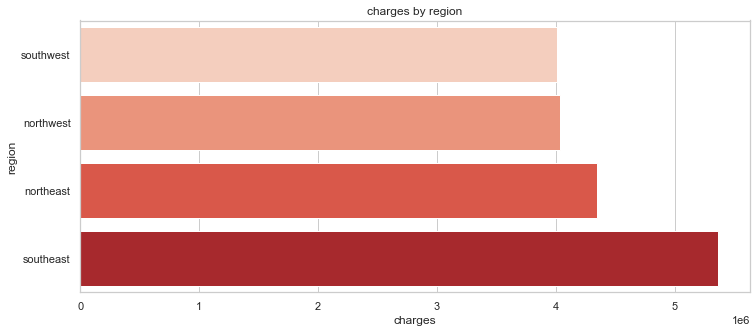

In [71]:
# the charge by region :
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.title('charges by region')
ax = sns.barplot(charges.head(), charges.head().index, palette='Reds')

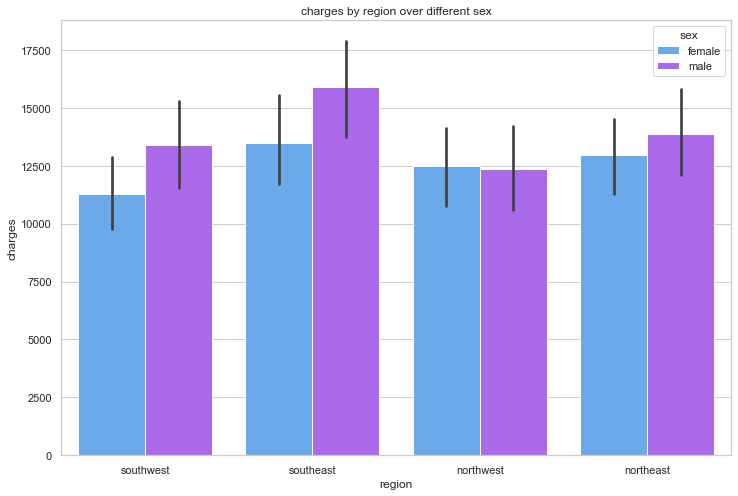

In [51]:
"""we can observe a higher charges in the southeast region """
f, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.title('charges by region over different sex')
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

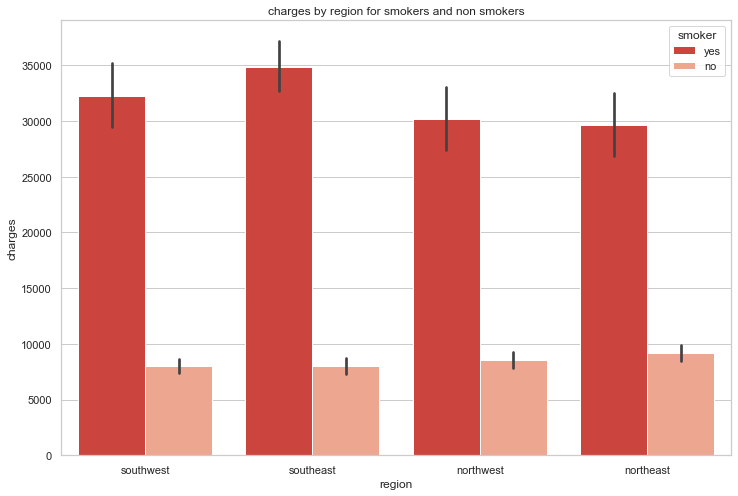

In [73]:
f, ax = plt.subplots(1,1, figsize=(12,8))
plt.title('charges by region for smokers and non smokers')
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

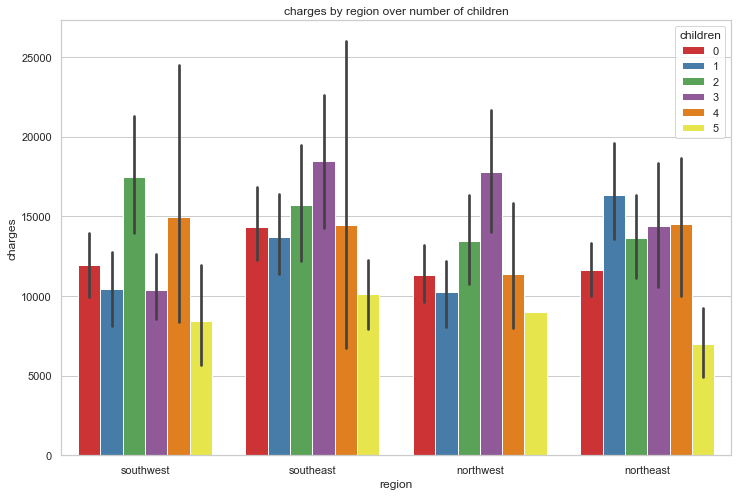

In [55]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.title('charges by region over number of children')
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

In [77]:
print("""As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. 
People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. 
And people with children tend to have higher medical costs overall as well""")

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. 
People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. 
And people with children tend to have higher medical costs overall as well


In [80]:
%%capture
!pip install sweetviz

In [4]:
import sweetviz
report = sweetviz.analyze([df,'df'],target_feat='charges')
report.show_html('report.html')


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [8]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()
groups = df['age_cat']
print(groups)
groups.plot.pie(autopct="%.1f%%")
# colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

# trace = go.Pie(labels=labels, values=amount,
#                hoverinfo='label+percent', textinfo='value', 
#                textfont=dict(size=20),
#                marker=dict(colors=colors, 
#                            line=dict(color='#000000', width=2)))

# data = [trace]
# layout = go.Layout(title="Amount by Age Category")

# fig = go.Figure(data=data, layout=layout)
# iplot(fig, filename='basic_pie_chart')

0        Young Adult
1        Young Adult
2        Young Adult
3        Young Adult
4        Young Adult
            ...     
1333    Senior Adult
1334     Young Adult
1335     Young Adult
1336     Young Adult
1337           Elder
Name: age_cat, Length: 1338, dtype: object


TypeError: '<' not supported between instances of 'str' and 'int'